Currency exchange is one of the biggest financial markets. Many factors affect exchange rates such as economic, political and even psychological factors. The prediction of the currency exchange rate is a difficult problem.

Predicting the currency exchange rates is the regression problem in machine learning. There are changes in exchange rates every day that affect the income of a person, a business and can even affect the economy of a country. Thus, predicting the currency exchange rates can help an individual as well as a country in many ways.

There are so many machine learning algorithms that we can use to predict future currency exchange rates. We can also use artificial neural networks for this task.

To predict the currency exchange rate, we first need to get the most appropriate data for this task. To get a dataset for this task just follow the steps mentioned below:

* Visit [Yahoo Finance](https://finance.yahoo.com/)
* Search for **USD/PKR**
* Click on **Historical Data**
* Click on **Download**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

In [3]:
data = pd.read_csv("PKR.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,161.050064,162.399994,160.987503,162.350006,162.350006,0
1,2020-10-20,160.868561,162.300003,160.638031,162.300003,162.300003,0
2,2020-10-21,160.472549,162.149994,160.472549,162.149994,162.149994,0
3,2020-10-22,160.885986,162.100006,160.471024,162.100006,162.100006,0
4,2020-10-23,160.857269,161.500000,160.041199,161.500000,161.500000,0


In this dataset, the values in the **Close** column are the target values that we need to predict. So let’s take a closer look at these values:

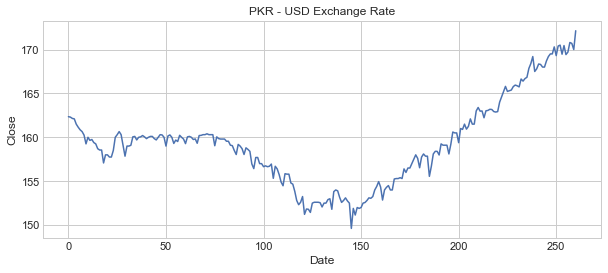

In [5]:
plt.figure(figsize=(10, 4))
plt.title("PKR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features before training the currency exchange rate prediction model:

In [6]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991925,0.996592,0.989746,0.989746,NaN
High,0.991925,1.000000,0.992549,0.993148,0.993148,NaN
Low,0.996592,0.992549,1.000000,0.990906,0.990906,NaN
Close,0.989746,0.993148,0.990906,1.000000,1.000000,NaN
Adj Close,0.989746,0.993148,0.990906,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


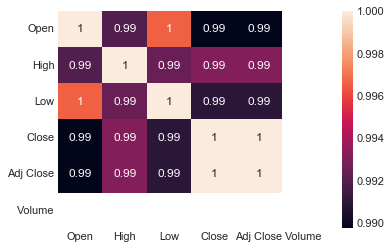

In [8]:
sns.heatmap(data.corr(), annot = True)
plt.show()

Now the next step is to prepare the dataset by storing the most relevant features in the variable `x` and storing the target column in the variable `y`:

In [9]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

Now let’s split the dataset and train a currency exchange prediction model using the Decision Tree Regression model:

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

Let’s have a look at the predicted values of currency exchange rates of **PAK Rupees** for the next 5 days:

In [12]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})

In [13]:
data.head()

,Predicted Rate
0,159.100006
1,152.500000
2,155.300003
3,160.500000
4,154.000000
